
# UWave Prelab

Name: Julian Lapenna \
Student ID: 96953443 \
Oct 9,2024 \
14:34

## Written questions

1. > What is the ratio $η = \frac EH$ for a plane electromagnetic wave in vacuum. Express your answer in Ω. (How?)

After skimming [wiki page](https://en.wikipedia.org/wiki/Impedance_of_free_space), I discovered $\eta = \frac EH$ is known as the _intrinsic impedance of vacuum_, as well as other names. 

I vaguely remember covering this in PHYS 401 from Griffiths textbook. From 6.3 in Griffiths, ${H}$ is defined in as ${H} \equiv \frac{1}{\mu_0} {B} - {M}$ which in our case means $H=\frac B{\mu_0}$.

In chapter 9 somewhere Griffiths says that for a plane wave, the real amplitudes of $E$ and $B$ fields are related by $B_0 = \frac{E_0}c = \frac1{\sqrt{\epsilon_0\mu_0}}$ and so putting these two together, just similifies down to $\eta = c\mu_0 = 376.73$, where $c$ is the speed of light in free space and $\mu_0$ is the magnetic constant. The units of $\mu_0$ are $[\textbf{N/A}^2]$, and for $c$ are simply $[\textbf{m/s}]$ and together these are units of $[\textbf{V/A}]=[\Omega]$.

So then $\eta = c\mu_0 = 376.73 \Omega$. Great it all works out!

2. > What is the E-field reflection coefficient for a plane wave in a material where $η_1 = E_1/H_1$ incident on another material where $η_2 \ne η_1$?

At the boundary what we're interested in is the speed in each medium. This is how I'll find the constants that signify the proportion transmitted and reflected fields of the plane wave.

So for some arbitrary medium with $n=\sqrt{\frac{\epsilon\mu}{\epsilon_0\mu_0}}$, the speed is $v=\frac cn$. Griffiths 9.3 derives the transmitted and reflected amplitudes as $E_R = (\frac{v_2-v_1}{v_2+v_1}) E_I$ and $E_T = (\frac{2v_2}{v_2+v_1}) E_I$ with $E_I$ being the incident wave. So to get these constants in terms of $\eta_1$ and $\eta_2$ we can solve these:

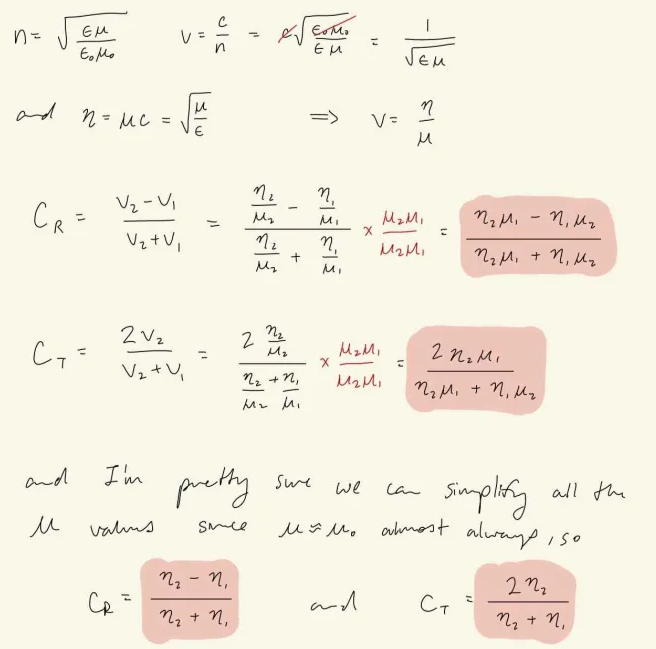

## Code questions: Smith Chart

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def Gamma(z0, z):
    return (z-z0)/(z+z0)

In [41]:
z0 = 50
r = 50
x = np.linspace(-1000,1000,2000)

z = r + 1j*x

reflection_coefficients1 = Gamma(z0, z)

print(reflection_coefficients1.shape)

(2000,)


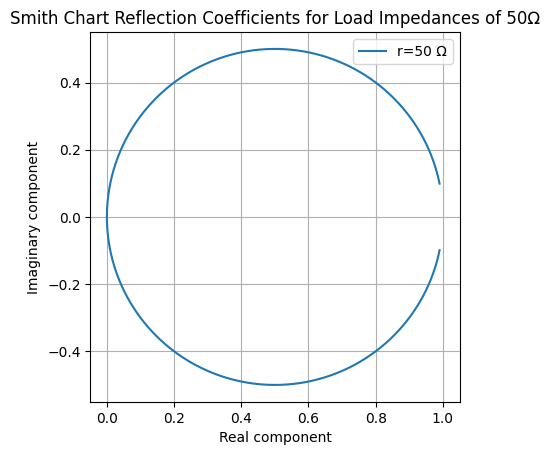

In [42]:
plt.plot(reflection_coefficients1.real, reflection_coefficients1.imag, label='r=50 Ω')
plt.title('Smith Chart Reflection Coefficients for Load Impedances of 50Ω')
plt.xlabel('Real component')
plt.ylabel('Imaginary component')
plt.axis('square')
plt.grid(True)
plt.legend(loc="upper right");

This appears to almost make a full circle, but it doesn't quite make it to the point $1 + 0i$. For large imaginary components of $z$, the coefficients become $1$, so if $|x|\to\infty$, I guess that would probably complete the circle... Given that I haven't worked much with Smith Charts, I'm not sure what physical interpretation this has.

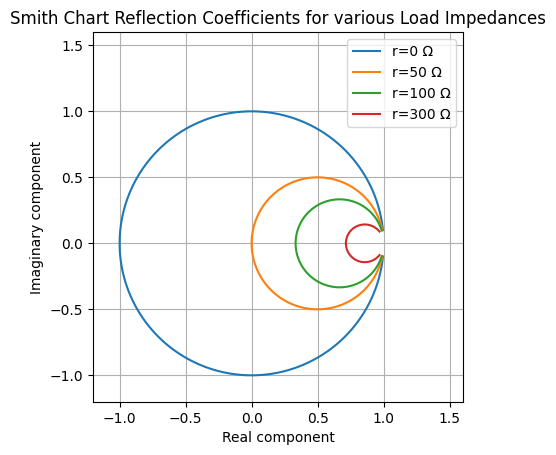

In [50]:
r = [0,50,100,300]

plt.figure()

for resistance in r:
    z = resistance + 1j * x
    coeff = Gamma(z0=50, z=z) 
    plt.plot(coeff.real, coeff.imag, label=f'r={resistance} Ω')

plt.title('Smith Chart Reflection Coefficients for various Load Impedances')
plt.xlabel('Real component')
plt.ylabel('Imaginary component')
plt.axis('square')
plt.grid(True)
plt.legend(loc="upper right");

plt.xlim([-1.2, 1.6])
plt.ylim([-1.2, 1.6])

plt.show()

So it looks like the $r=50\Omega$ is the only case that passes through the origin. This makes sense because the characteristic waveguide impedance is $50\Omega$ which means for an imaginary component of $0i$ the value of the coefficient is just 0.

As the resistance increases, the radius decreases. For the case of $r=0$ it is a unit circle $|\Gamma| = 1$, which means there is no load impedance and total reflection occurs.

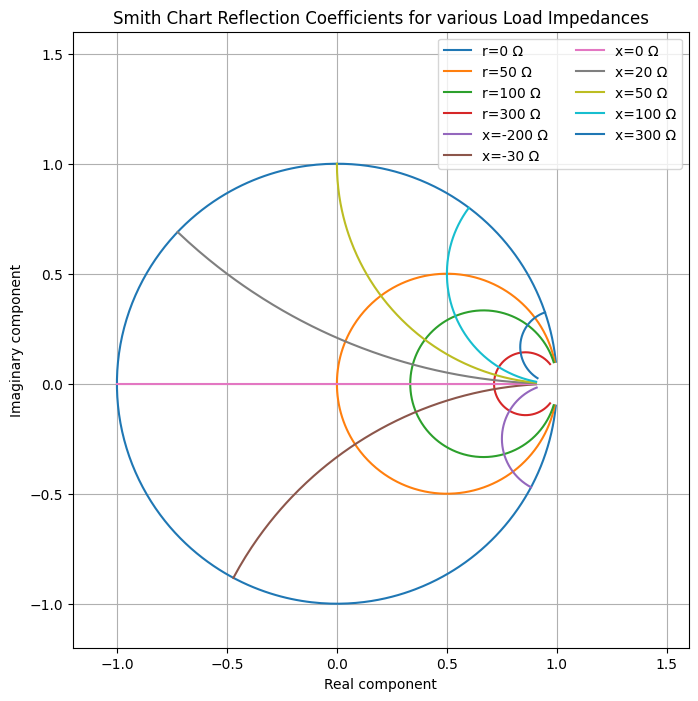

In [39]:
r = [0,50,100,300]
x = np.linspace(-1000,1000,2000)

plt.figure(figsize=(8, 8))

for resistance in r:
    z = resistance + 1j * x
    coeff = Gamma(z0=50, z=z) 
    plt.plot(coeff.real, coeff.imag, label=f'r={resistance} Ω')

x_var = [-200,-30,0,20,50,100,300]
r_var = np.linspace(0,1000,1000)

for x in x_var:
    z = r_var + 1j * x
    coeff = Gamma(z0=50, z=z) 
    plt.plot(coeff.real, coeff.imag, label=f'x={x} Ω')

plt.title('Smith Chart Reflection Coefficients for various Load Impedances')
plt.xlabel('Real component')
plt.ylabel('Imaginary component')
plt.axis('square')
plt.grid(True)
plt.legend(loc="upper right", ncol=2);

plt.xlim([-1.2, 1.6])
plt.ylim([-1.2, 1.6])
plt.show()

Woah! Pretty cool 😊

These lines are only part circles because $r \in [0,\infty)$ and a negative real part of resistance wouldn't have physical meaning. If $r$ ranged to $-\infty$, I think the circles would loop around all touching $1+0i$ like the first set, instead of circles starting at $1+0i$ that are bounded by the unit circle.

I have taken note that any point inside the ciricle |Γ| = 1 corresponds to a unique pair of values (r, x)!

Takeaways:
 - Fix r ($\ge 0$), vary x $\Longrightarrow$ circles going left from $(1,0)$
 - Fix x, vary r ($\ge 0$) $\Longrightarrow$ circles bounded by unit circle out from $(1,0)$
 - Any point inside the ciricle $|\Gamma| = 1$ corresponds to a unique pair of values $(r, x)$